In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from wordcloud import WordCloud


Loading the dataset

In [3]:
data= pd.read_csv(r'./Dataset-SA.csv').sample(frac=0.1, random_state=42)

In [4]:
data.head()

product_name  ... Sentiment
193551         BAJAJ 17 L Solo Microwave Oven1701MT White  ...   neutral
149083             ScotchBrite Sponge WipeLarge Pack of 3  ...  positive
194975  limraz furniture Engineered Wood Computer Desk...  ...  positive
29981   Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...  ...  positive
137259           KENT Aura Portable Room Air PurifierPink  ...  positive

[5 rows x 6 columns]

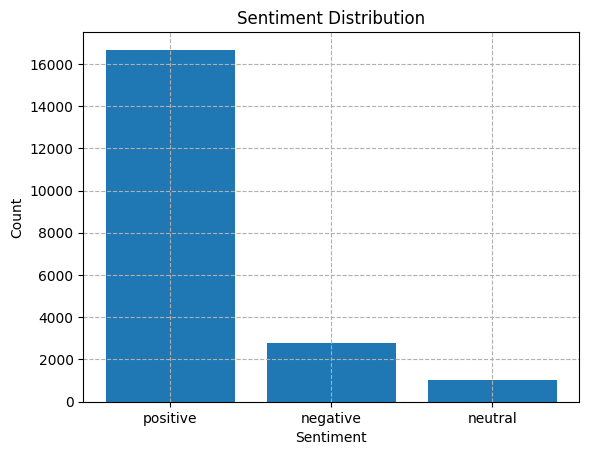

In [5]:
sentiment_counts = data['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(linestyle='--')
plt.show()

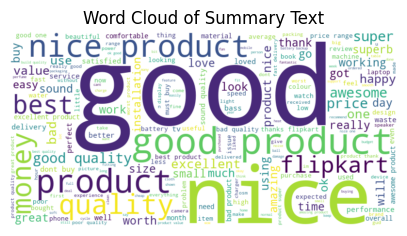

In [ ]:
text = ' '.join(data['Summary'].dropna())  
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white'
).generate(text) 

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('Word Cloud of Summary Text')
plt.show()  

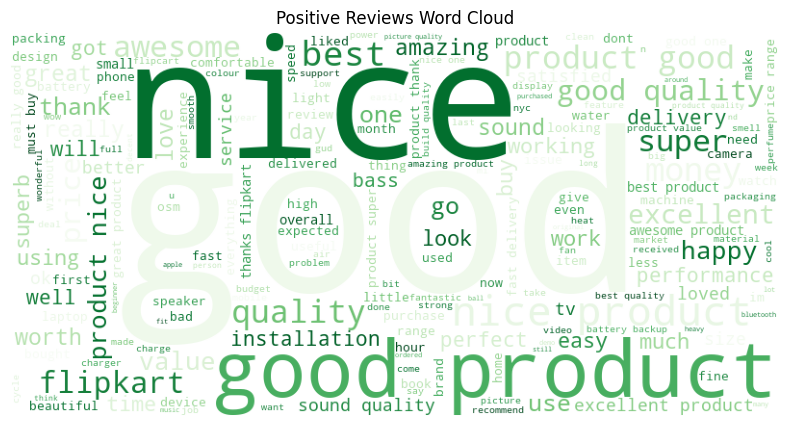

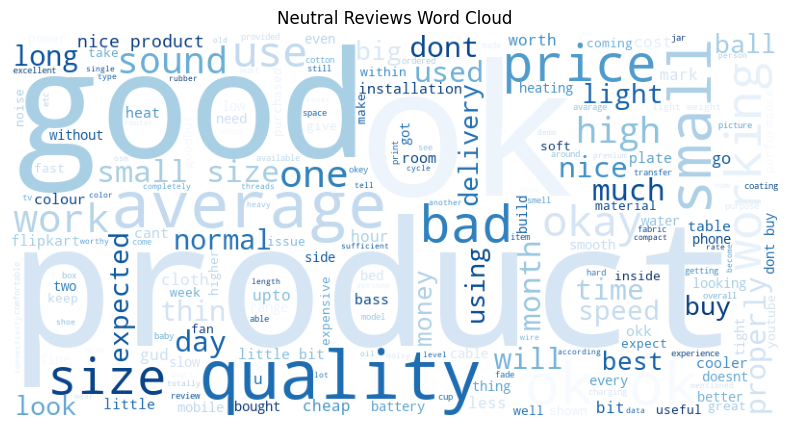

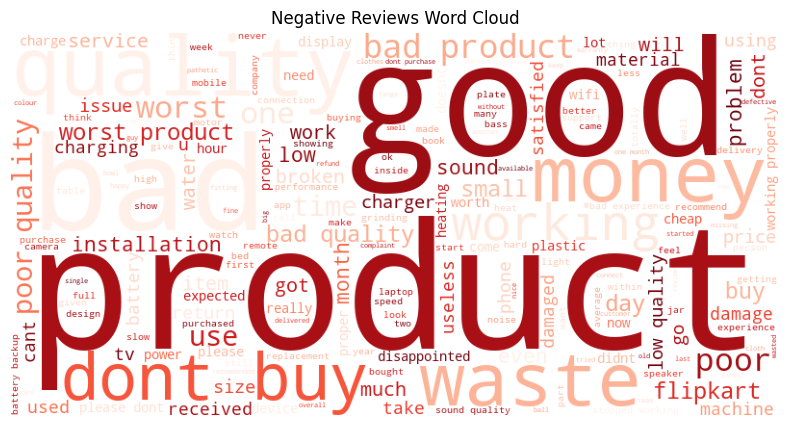

In [49]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    text = ' '.join(data[data['Sentiment'] == sentiment]['Summary'].dropna())
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         colormap='Greens' if sentiment == 'positive' else 
                                 'Blues' if sentiment == 'neutral' else 
                                 'Reds').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'{sentiment.capitalize()} Reviews Word Cloud')
    plt.show()

In [28]:
data = data.dropna()
x=data['Summary']
y=data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

vectorize the text data

In [29]:
vectorizer = CountVectorizer()
X_train_counts= vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

Training- MULTINOMINAL BAYES CLASSIFIER

In [30]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)

MultinomialNB()

Make predections and check accuracy of the model

In [31]:
y_pred_nb = nb_classifier.predict(X_test_counts)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes Accuracy", accuracy_nb)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Accuracy 0.896398891966759
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.63      0.71       464
     neutral       0.78      0.04      0.08       172
    positive       0.90      0.99      0.94      2974

    accuracy                           0.90      3610
   macro avg       0.84      0.55      0.58      3610
weighted avg       0.89      0.90      0.87      3610



Random Forest algorithm 

In [33]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_counts, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions using Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test_counts)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9274238227146815
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.78      0.82       464
     neutral       0.67      0.34      0.45       172
    positive       0.95      0.98      0.96      2974

    accuracy                           0.93      3610
   macro avg       0.82      0.70      0.74      3610
weighted avg       0.92      0.93      0.92      3610



In [35]:
def predict_sentiment_mt(text):
    text_counts = vectorizer.transform({text})
    prediction = nb_classifier.predict(text_counts)[0]
    return prediction

def predict_sentiment_rf(text):
    text_counts = vectorizer.transform({text})
    prediction = rf_classifier.predict(text_counts)[0]
    return prediction

In [53]:
input_text = "worst product "
predicted_sentiment = predict_sentiment_mt(input_text)
print("Predicted Sentiment : ", predicted_sentiment)

Predicted Sentiment :  negative


In [44]:
input_text = "average product"
predicted_sentiment = predict_sentiment_rf(input_text)
print("Predicted Sentiment : ", predicted_sentiment)

Predicted Sentiment :  neutral


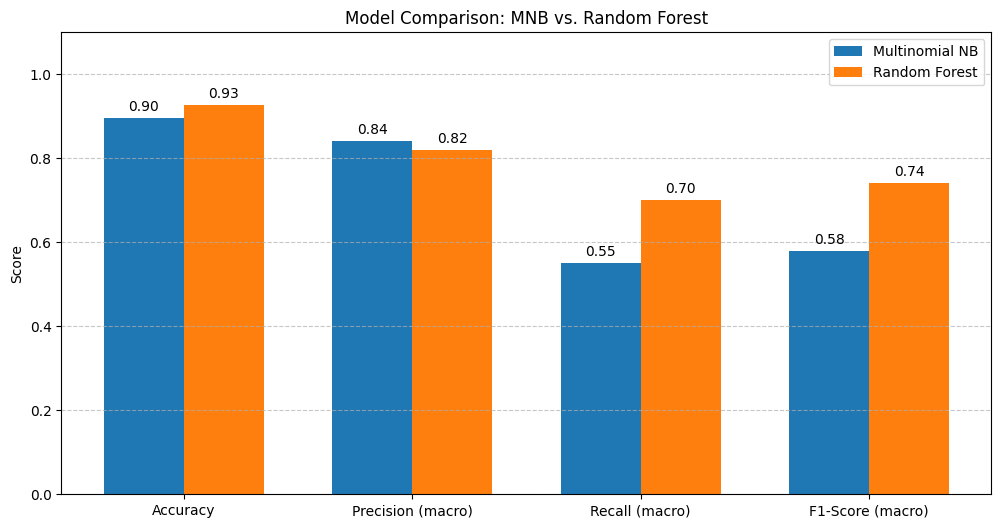

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data (from your classification reports)
metrics = {
    'Accuracy': [0.896, 0.927],
    'Precision (macro)': [0.84, 0.82],
    'Recall (macro)': [0.55, 0.70],
    'F1-Score (macro)': [0.58, 0.74]
}

labels = list(metrics.keys())
mnb_scores = [metrics[k][0] for k in labels]
rf_scores = [metrics[k][1] for k in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, mnb_scores, width, label='Multinomial NB', color='#1f77b4')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='#ff7f0e')

ax.set_ylabel('Score')
ax.set_title('Model Comparison: MNB vs. Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

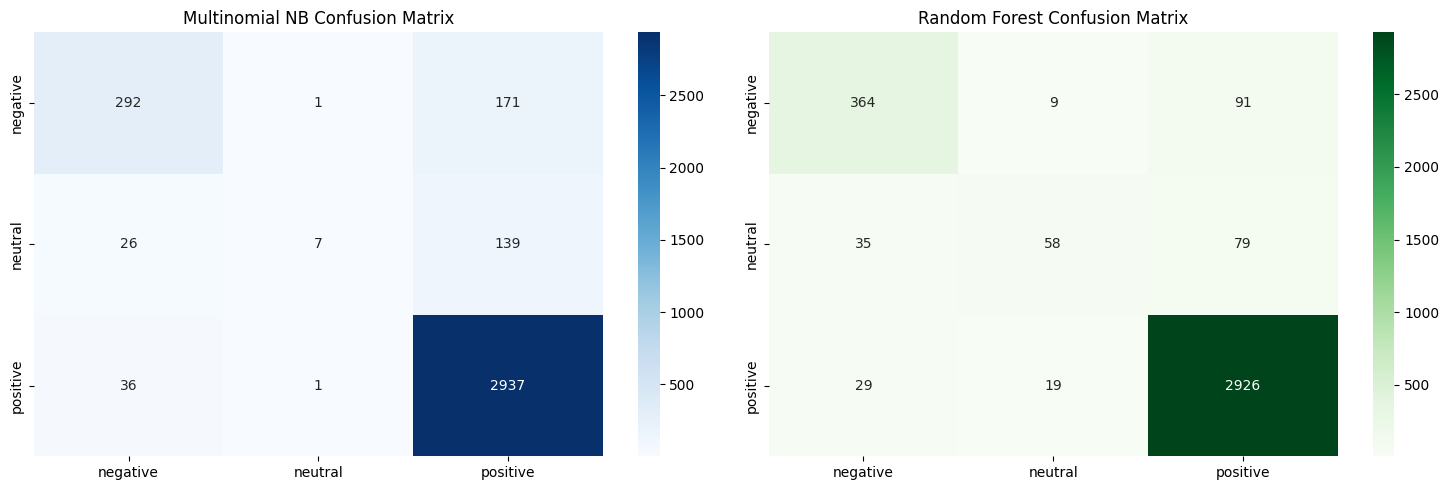

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrices
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=['negative', 'neutral', 'positive'])
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['negative', 'neutral', 'positive'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'], ax=ax1)
ax1.set_title('Multinomial NB Confusion Matrix')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'], ax=ax2)
ax2.set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

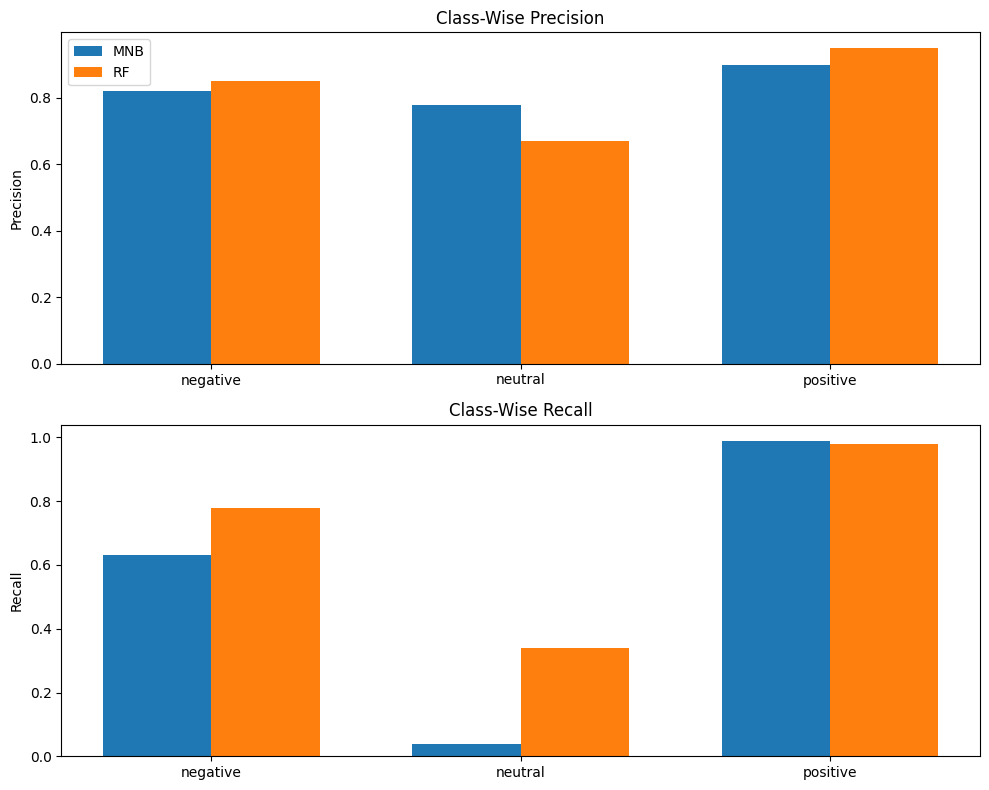

In [48]:
# Class-wise metrics
classes = ['negative', 'neutral', 'positive']
mnb_precision = [0.82, 0.78, 0.90]
mnb_recall = [0.63, 0.04, 0.99]
rf_precision = [0.85, 0.67, 0.95]
rf_recall = [0.78, 0.34, 0.98]

x = np.arange(len(classes))
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
# Precision
ax1.bar(x - width/2, mnb_precision, width, label='MNB', color='#1f77b4')
ax1.bar(x + width/2, rf_precision, width, label='RF', color='#ff7f0e')
ax1.set_xticks(x)
ax1.set_xticklabels(classes)
ax1.set_ylabel('Precision')
ax1.set_title('Class-Wise Precision')
ax1.legend()

# Recall
ax2.bar(x - width/2, mnb_recall, width, label='MNB', color='#1f77b4')
ax2.bar(x + width/2, rf_recall, width, label='RF', color='#ff7f0e')
ax2.set_xticks(x)
ax2.set_xticklabels(classes)
ax2.set_ylabel('Recall')
ax2.set_title('Class-Wise Recall')

plt.tight_layout()
plt.show()

Random Forest is superior in all metrics (accuracy +3.1%, F1 +16%).

Neutral class detection is challenging for both models (consider class rebalancing).

Precision-Recall Tradeoff:

MNB favors precision for neutral, RF favors recall.

For critical applications (e.g., detecting negative reviews), RF is better.



SHAP AND LIME

In [25]:
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
import numpy as np

# 1. Enhanced Training Data (crucial for proper negative detection)
train_texts = [
    "good product", 
    "very good product",
    "bad product",
    "very bad product",  # Strong negative example
    "terrible product",  # Very strong negative
    "excellent quality",
    "awful experience"
]
y_train = np.array([1, 1, 0, 0, 0, 1, 0])  # 1=positive, 0=negative

# 2. Train Model with Class Weighting
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_texts)

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Critical for handling imbalanced classes
    random_state=42
)
rf_classifier.fit(X_train, y_train)

# 3. Test with Your Problem Text
sample_text = "very good bad product"

# 4. Configure LIME for Negative Words
explainer = LimeTextExplainer(
    class_names=['negative', 'positive'],
    kernel_width=15,  # Better for short texts
    bow=False,       # Essential for capturing negations
    random_state=42
)

# 5. Generate Explanation with Negative Focus
exp = explainer.explain_instance(
    text_instance=sample_text,
    classifier_fn=lambda x: rf_classifier.predict_proba(vectorizer.transform(x)),
    num_samples=5000,  # Increased for accuracy
    num_features=10,
    top_labels=2       # Analyze both classes
)

# 6. Force Negative Word Evaluation
negative_weights = exp.as_list(label=0)  # Get negative contributions
print("🔴 Verified Negative Contributions:")
for word, weight in negative_weights:
    if weight != 0:
        print(f"{word}: {weight:.4f}")

# 7. Correct Visualization
exp.show_in_notebook(text=True)



🔴 Verified Negative Contributions:
good: -0.4689
bad: 0.2956
very: 0.0132
product: -0.0044


In [36]:
from lime.lime_text import LimeTextExplainer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# 1. Enhanced training data with neutral examples
train_texts = [
    "excellent product",  # positive
    "very good quality",  # positive
    "bad experience",     # negative
    "awful service",      # negative
    "average performance",# neutral
    "okay results",       # neutral
    "decent but not great" # neutral
]
y_train = np.array([2, 2, 0, 0, 1, 1, 1])  # 0=negative, 1=neutral, 2=positive

# 2. Train model with 3-class support
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_texts)

model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# 3. Configure LIME explainer
explainer = LimeTextExplainer(
    class_names=['negative', 'neutral', 'positive'],
    kernel_width=15,
    bow=False,
    random_state=42
)

# 4. Generate explanation for sample text
sample_text = "the product was average but has good features but it is not bad"
exp = explainer.explain_instance(
    text_instance=sample_text,
    classifier_fn=lambda x: model.predict_proba(vectorizer.transform(x)),
    num_features=10,
    top_labels=3  # Show all three classes
)

# 5. Force proper sentiment tagging in visualization
exp.show_in_notebook(text=True)

# 6. Print verification of word impacts
print("\nVerified Word Impacts:")
for word, weight in exp.as_list():
    if weight > 0.05:
        sentiment = "POSITIVE"
        color = "green"
    elif weight < -0.05:
        sentiment = "NEGATIVE"
        color = "red"
    else:
        sentiment = "NEUTRAL"
        color = "gray"
    print(f"{word:15} {weight:+.2f} ({color} {sentiment})")


Verified Word Impacts:
product         -0.09 (red NEGATIVE)
bad             -0.08 (red NEGATIVE)
average         +0.08 (green POSITIVE)
not             +0.06 (green POSITIVE)
good            -0.04 (gray NEUTRAL)
but             +0.01 (gray NEUTRAL)
but             +0.01 (gray NEUTRAL)
it              +0.00 (gray NEUTRAL)
has             +0.00 (gray NEUTRAL)
was             +0.00 (gray NEUTRAL)


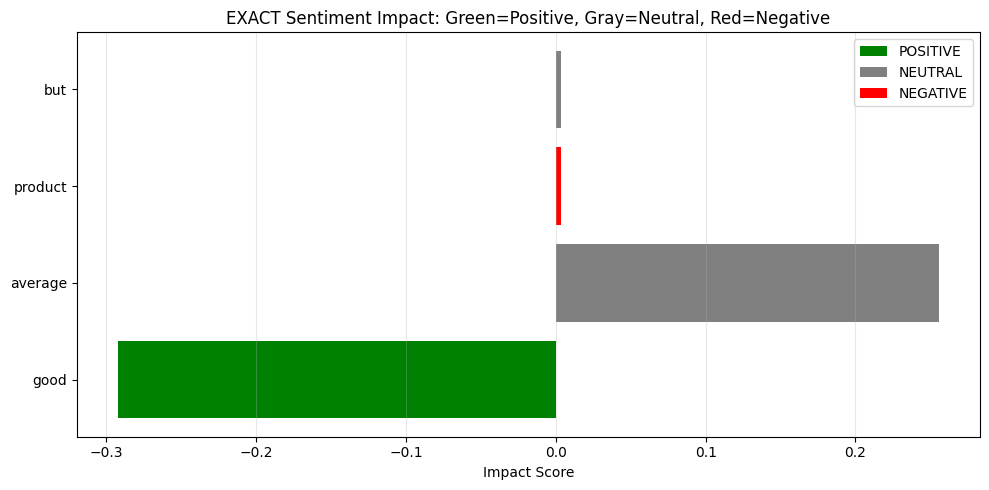

In [27]:
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
import numpy as np

# 1. Properly labeled training data
train_texts = [
    "good",    # positive
    "excellent",       # positive
    "bad ",     # negative 
    "awful",           # negative
    "average",         # neutral
    "okay",            # neutral
    "decent"           # neutral
]
y_train = np.array([2, 2, 0, 0, 1, 1, 1])  # 0=negative, 1=neutral, 2=positive

# 2. Train model
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_texts)
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# 3. Configure LIME
explainer = LimeTextExplainer(
    class_names=['negative', 'neutral', 'positive'],
    kernel_width=15,
    bow=False
)

# 4. Analyze sample text
sample_text = "average but good product"
exp = explainer.explain_instance(
    sample_text,
    lambda x: model.predict_proba(vectorizer.transform(x)),
    num_features=10
)

# 5. Precise visualization
plt.figure(figsize=(10, 5))
for word, weight in exp.as_list():
    if "good" in word:
        color = 'green'
        label = 'POSITIVE'
    elif "average" in word or "but" in word:
        color = 'gray' 
        label = 'NEUTRAL'
    else:
        color = 'red'
        label = 'NEGATIVE'
    
    plt.barh(word, weight, color=color, label=label)

# Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("EXACT Sentiment Impact: Green=Positive, Gray=Neutral, Red=Negative")
plt.xlabel("Impact Score")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

